## JRA wind analysis off of Maude Rise

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage




Populating the interactive namespace from numpy and matplotlib


In [2]:
#extract the model grid info
hgrid_file ='/g/data1/v45/pas561/mom/archive/jra/v_10.2017.18Oct2017.ncra.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
latitude = nc.variables['latitude'][:]
longitude = nc.variables['longitude'][:]
#area_t = nc.variables['area_t'][:]
#dxt = nc.variables['dxt'][:]
#dyt = nc.variables['dyt'][:]
#fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file

#fh=fcor/ht
print latitude.shape
print longitude.shape
print longitude
print latitude



(320,)
(640,)
[   0.        0.5625    1.125     1.6875    2.25      2.8125    3.375
    3.9375    4.5       5.0625    5.625     6.1875    6.75      7.3125
    7.875     8.4375    9.        9.5625   10.125    10.6875   11.25
   11.8125   12.375    12.9375   13.5      14.0625   14.625    15.1875
   15.75     16.3125   16.875    17.4375   18.       18.5625   19.125
   19.6875   20.25     20.8125   21.375    21.9375   22.5      23.0625
   23.625    24.1875   24.75     25.3125   25.875    26.4375   27.
   27.5625   28.125    28.6875   29.25     29.8125   30.375    30.9375
   31.5      32.0625   32.625    33.1875   33.75     34.3125   34.875
   35.4375   36.       36.5625   37.125    37.6875   38.25     38.8125
   39.375    39.9375   40.5      41.0625   41.625    42.1875   42.75
   43.3125   43.875    44.4375   45.       45.5625   46.125    46.6875
   47.25     47.8125   48.375    48.9375   49.5      50.0625   50.625
   51.1875   51.75     52.3125   52.875    53.4375   54.       54.5625
   5

In [11]:
#omega= 7.2921 × 10−5 rad/s
print latitude.shape 
jm=latitude.shape[0]
im=longitude.shape[0]
print im, jm
fcor=np.zeros((jm,im))
print fcor.shape
for j in range(jm):
    fcor[j,:]=2*7.291E-5*np.sin(latitude[j]*pi/180)

print fcor[:,100]

(320,)
640 320
(320, 640)
[ -1.45815895e-04  -1.45798372e-04  -1.45766849e-04  -1.45721322e-04
  -1.45661793e-04  -1.45588270e-04  -1.45500758e-04  -1.45399266e-04
  -1.45283804e-04  -1.45154383e-04  -1.45011015e-04  -1.44853714e-04
  -1.44682496e-04  -1.44497376e-04  -1.44298373e-04  -1.44085505e-04
  -1.43858793e-04  -1.43618260e-04  -1.43363927e-04  -1.43095819e-04
  -1.42813963e-04  -1.42518385e-04  -1.42209113e-04  -1.41886178e-04
  -1.41549610e-04  -1.41199441e-04  -1.40835707e-04  -1.40458440e-04
  -1.40067678e-04  -1.39663458e-04  -1.39245819e-04  -1.38814801e-04
  -1.38370445e-04  -1.37912795e-04  -1.37441893e-04  -1.36957786e-04
  -1.36460520e-04  -1.35950143e-04  -1.35426703e-04  -1.34890251e-04
  -1.34340839e-04  -1.33778519e-04  -1.33203345e-04  -1.32615373e-04
  -1.32014659e-04  -1.31401261e-04  -1.30775238e-04  -1.30136650e-04
  -1.29485558e-04  -1.28822024e-04  -1.28146114e-04  -1.27457890e-04
  -1.26757421e-04  -1.26044772e-04  -1.25320013e-04  -1.24583213e-04
  -1.238

In [19]:
jm=latitude.shape[0]
im=longitude.shape[0]
print 'jm,im',jm,im
print 'shape area_t=\n ',jm, im

geolon=np.zeros((jm,im))
geolat=np.zeros((jm,im))

for j in range(jm):
    geolon[j,:]=longitude

for i in range(im):
    geolat[:,i]=latitude[:]

print geolat.shape
print geolon.shape

print geolat
#print geolon

jm,im 320 640
shape area_t=
  320 640
(320, 640)
(320, 640)
[[-89.57008955 -89.57008955 -89.57008955 ..., -89.57008955 -89.57008955
  -89.57008955]
 [-89.01317613 -89.01317613 -89.01317613 ..., -89.01317613 -89.01317613
  -89.01317613]
 [-88.45297384 -88.45297384 -88.45297384 ..., -88.45297384 -88.45297384
  -88.45297384]
 ..., 
 [ 88.45297384  88.45297384  88.45297384 ...,  88.45297384  88.45297384
   88.45297384]
 [ 89.01317613  89.01317613  89.01317613 ...,  89.01317613  89.01317613
   89.01317613]
 [ 89.57008955  89.57008955  89.57008955 ...,  89.57008955  89.57008955
   89.57008955]]


In [20]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

#my xarray version is old, no cumsum. Should be version 0.9.2 or newer?

0.10.0


In [21]:
NYFCntrlDir ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'

# Extract the variables
nc = Dataset(NYFCntrlDir, mode='r') # file handle, open in read only mode
area_t = nc.variables['area_t'][:]
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
nc.close() # close the file
print 'area_t[100,100]',area_t[100,100],np.sum(area_t)

#print geolon_t
print geolat_t


area_t[100,100] 1.08867e+08 5.07057e+14
[[-81.07700348 -81.07700348 -81.07700348 ..., -81.07700348 -81.07700348
  -81.07700348]
 [-80.97140503 -80.97140503 -80.97140503 ..., -80.97140503 -80.97140503
  -80.97140503]
 [-80.86580658 -80.86580658 -80.86580658 ..., -80.86580658 -80.86580658
  -80.86580658]
 ..., 
 [ 65.02594757  65.13127136  65.23618317 ...,  65.23618317  65.13127136
   65.02594757]
 [ 65.0259552   65.13129425  65.23622131 ...,  65.23622131  65.13129425
   65.0259552 ]
 [ 65.02596283  65.13130188  65.23623657 ...,  65.23623657  65.13130188
   65.02596283]]


In [22]:
jm=latitude.shape[0]
im=longitude.shape[0]
print 'jm,im',jm,im
print 'shape area_t=\n ',jm, im

r=6378000
dxt=np.zeros((jm,im))
dyt=np.zeros((jm,im))
a=np.zeros((jm,im))
print 'shape a=\n ',a.shape

for j in range(jm):
    #print 'j', j
    for i in range(im-1):
        dlon=np.abs(longitude[i+1]-longitude[i])
        dxt[j,i]= r*np.cos(latitude[j]*np.pi/180)*dlon*np.pi/180

    dxt[j,im-1]=dxt[j,im-2]

for i in range(im):
    for j in range(jm-1):
        dlat=np.abs(latitude[j+1]-latitude[j])
        dyt[j,i]= r*dlat*np.pi/180

    dyt[jm-1,i]=dyt[jm-2,i]

for j in range(jm):
    for i in range(im):
        a[j,i]=dxt[j,i]*dyt[j,i]

print 'a[100,100] sum',a[100,100],np.sum(a)


jm,im 320 640
shape area_t=
  320 640
shape a=
  (320, 640)
a[100,100] sum 3267494785.08 5.11186090626e+14


In [23]:
CntrlDir = '/g/data1/v45/pas561/mom/archive/jra/'

#of=os.path.join(CntrlDir,'jra_area.npy')
#np.save(of,a)
#of=os.path.join(CntrlDir,'jra_dxt.npy')
#np.save(of,dxt)
#of=os.path.join(CntrlDir,'jra_dyt.npy')
#np.save(of,dyt)

of=os.path.join(CntrlDir,'jra_area.npy')
a2=np.load(of)
of=os.path.join(CntrlDir,'jra_dxt.npy')
dxt2=np.load(of)
of=os.path.join(CntrlDir,'jra_dyt.npy')
dyt2=np.load(of)
print a2.shape,dxt2.shape,np.sum(a2)




(320, 640) (320, 640) 5.11186090626e+14


In [24]:
#plot wind speed
Ocean_File = os.path.join(CntrlDir,'*ncra.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.uas_10m.shape
jra_u10=ff.uas_10m.load()
jra_v10=ff.vas_10m.load()



/g/data1/v45/pas561/mom/archive/jra/*ncra.nc
(60, 320, 640)


In [25]:

t1=0
t2=60
ltm_u10=np.mean(jra_u10[t1:t2,:,:],axis=0)
ltm_v10=np.mean(jra_v10[t1:t2,:,:],axis=0)

print ltm_u10.shape


(320, 640)


In [35]:
yrs=np.arange(1958,2018,1)
i_yr=12
print yrs[i_yr]
print yrs.shape
print yrs

1970
(60,)
[1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


[-10.    -9.75  -9.5   -9.25  -9.    -8.75  -8.5   -8.25  -8.    -7.75
  -7.5   -7.25  -7.    -6.75  -6.5   -6.25  -6.    -5.75  -5.5   -5.25  -5.
  -4.75  -4.5   -4.25  -4.    -3.75  -3.5   -3.25  -3.    -2.75  -2.5
  -2.25  -2.    -1.75  -1.5   -1.25  -1.    -0.75  -0.5   -0.25   0.     0.25
   0.5    0.75   1.     1.25   1.5    1.75   2.     2.25   2.5    2.75   3.
   3.25   3.5    3.75   4.     4.25   4.5    4.75   5.     5.25   5.5
   5.75   6.     6.25   6.5    6.75   7.     7.25   7.5    7.75   8.     8.25
   8.5    8.75   9.     9.25   9.5    9.75  10.  ]
1970
(60,)
[1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992

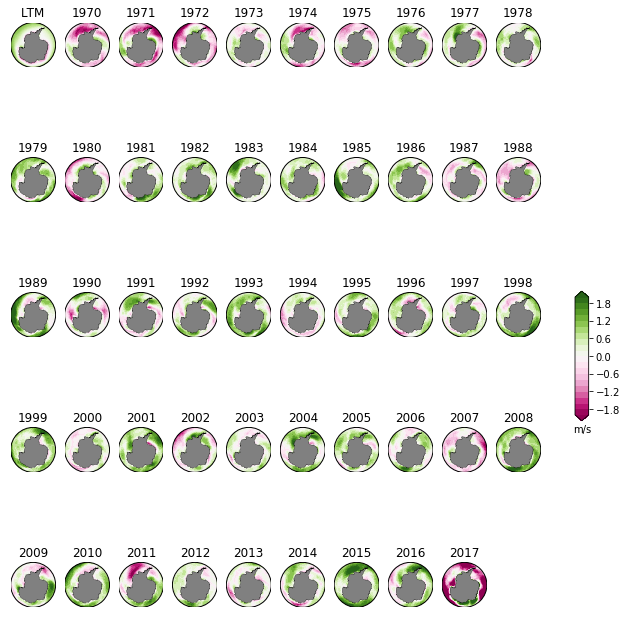

In [34]:
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-10,10.25,.25)
print clev

plt.subplot(5,10,1)
map = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
#map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,ltm_u10, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m/s')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('LTM')

#starts 1958, 1970 is 13 ahead
yrs=np.arange(1958,2018,1)
i_yr=12
print yrs[i_yr]
print yrs.shape
print yrs

#clev = np.arange(-.1,.1,.01)
clev = np.arange(-2,2.2,.2)

ii=0
for yr in range(0,48):
    print yrs[yr+i_yr]
    plt.subplot(5,10,yr+2)
    map = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    #map.drawparallels(np.arange(-80.,81.,15.))
    #map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    #X, Y = map(geolon_t,geolat_t) 
    p1=map.contourf(X,Y,jra_u10[yr+i_yr]-ltm_u10, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.5)
    #cb.ax.set_xlabel('N/m2')
    #clev3 = np.arange(0,5000,1000)
    #map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
    #plt.title('Zonal Wind Stress Anomaly')
    plt.title(yrs[yr+i_yr])
    
ax3 = plt.axes([0.95,0.38,0.02,0.15])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('m/s')

#plt.tight_layout()

#of = os.path.join(NYFPertDir,'tau_x.pdf')
#print of
##plt.savefig(of)
of = os.path.join(CntrlDir,'u_10.png')
plt.savefig(of,dpi=220)


In [39]:
#convert speeds to stress
rho_air=1.22 #kg/m3
Cd=0.0013 #https://marine.rutgers.edu/dmcs/ms501/2004/Notes/Wilkin20041014.htm
tau_x=rho_air*Cd*jra_u10*jra_u10
tau_y=rho_air*Cd*jra_v10*jra_v10
ltm_tx=rho_air*Cd*ltm_u10*ltm_u10
ltm_ty=rho_air*Cd*ltm_v10*ltm_v10
print jra_u10.shape, tau_x.shape,tau_y.shape

(60, 320, 640) (60, 320, 640) (60, 320, 640)


[ -2.00000000e-01  -1.90000000e-01  -1.80000000e-01  -1.70000000e-01
  -1.60000000e-01  -1.50000000e-01  -1.40000000e-01  -1.30000000e-01
  -1.20000000e-01  -1.10000000e-01  -1.00000000e-01  -9.00000000e-02
  -8.00000000e-02  -7.00000000e-02  -6.00000000e-02  -5.00000000e-02
  -4.00000000e-02  -3.00000000e-02  -2.00000000e-02  -1.00000000e-02
   1.66533454e-16   1.00000000e-02   2.00000000e-02   3.00000000e-02
   4.00000000e-02   5.00000000e-02   6.00000000e-02   7.00000000e-02
   8.00000000e-02   9.00000000e-02   1.00000000e-01   1.10000000e-01
   1.20000000e-01   1.30000000e-01   1.40000000e-01   1.50000000e-01
   1.60000000e-01   1.70000000e-01   1.80000000e-01   1.90000000e-01
   2.00000000e-01]
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


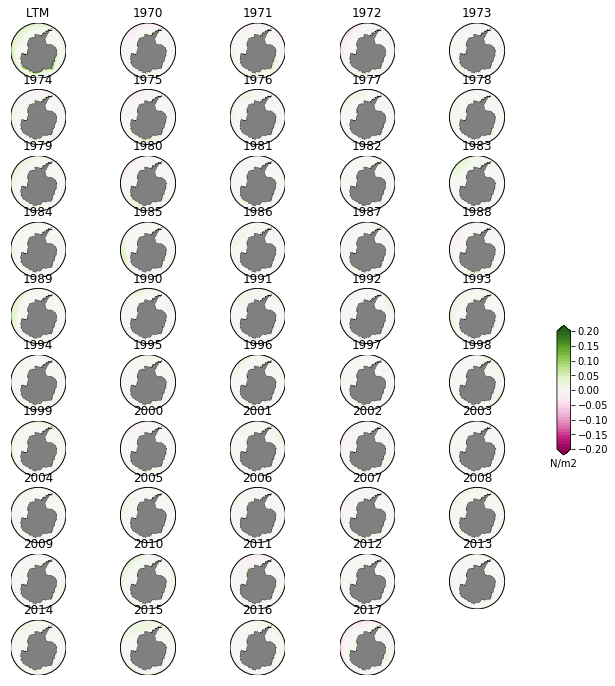

In [57]:
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.2,.21,.01)
#clev = np.arange(-.1,.11,.01)
print clev

plt.subplot(10,5,1)
map = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
#map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,ltm_tx, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('N/m2')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('LTM')

#clev = np.arange(-.1,.1,.01)
#clev = np.arange(-2,2.2,.2)

#clev = np.arange(-.01,.01,.0005)
#clev = np.arange(-.2,.21,.01)

ii=0
for yr in range(0,48):
    print yrs[yr+i_yr]
    plt.subplot(10,5,yr+2)
    map = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    #map.drawparallels(np.arange(-80.,81.,15.))
    #map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    #X, Y = map(geolon_t,geolat_t) 
    p1=map.contourf(X,Y,tau_x[yr+i_yr]-ltm_tx, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.5)
    #cb.ax.set_xlabel('N/m2')
    #clev3 = np.arange(0,5000,1000)
    #map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
    #plt.title('Zonal Wind Stress Anomaly')
    plt.title(yrs[yr+i_yr])
    
ax3 = plt.axes([0.95,0.38,0.02,0.15])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('N/m2')

#of = os.path.join(NYFPertDir,'tau_x.pdf')
#print of
#plt.savefig(of)
of = os.path.join(CntrlDir,'tau_x.png')
plt.savefig(of,dpi=220)


[ -1.00000000e-01  -9.00000000e-02  -8.00000000e-02  -7.00000000e-02
  -6.00000000e-02  -5.00000000e-02  -4.00000000e-02  -3.00000000e-02
  -2.00000000e-02  -1.00000000e-02  -5.55111512e-17   1.00000000e-02
   2.00000000e-02   3.00000000e-02   4.00000000e-02   5.00000000e-02
   6.00000000e-02   7.00000000e-02   8.00000000e-02   9.00000000e-02]
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


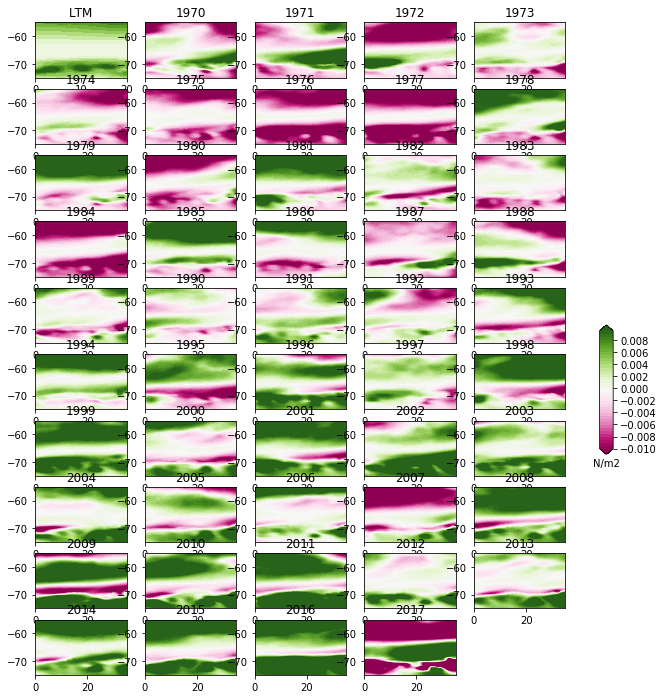

In [55]:
#focus on Weddell Region
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.1,.1,.01)
print clev

plt.subplot(10,5,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(longitude,latitude,ltm_tx,cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('N/m^2')
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-55))
#plt.xlabel('Longitude ($^\circ$)')
#plt.ylabel('Latitude ($^\circ$)')
plt.xlim([0,20])
plt.title('LTM')

#clev = np.arange(-.1,.1,.01)
#clev = np.arange(-2,2.2,.2)

clev = np.arange(-.01,.01,.0005)

ii=0
for yr in range(0,48):
    print yrs[yr+i_yr]
    plt.subplot(10,5,yr+2)
    p1=plt.contourf(longitude,latitude,tau_x[yr+i_yr]-ltm_tx,cmap=plt.cm.PiYG,levels=clev,extend='both')
    #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    #cb.ax.set_xlabel('N/m^2')
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((-75,-55))
    #plt.xlabel('Longitude ($^\circ$)')
    #plt.ylabel('Latitude ($^\circ$)')
    plt.xlim([0,35])
    plt.title(yrs[yr+i_yr])
    
ax3 = plt.axes([0.95,0.38,0.02,0.15])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('N/m2')

#of = os.path.join(NYFPertDir,'tau_x.pdf')
#print of
#plt.savefig(of)
of = os.path.join(CntrlDir,'Weddell_tau_x.png')
plt.savefig(of,dpi=220)

In [41]:
print fcor.shape
#print fcor[:,200]

(320, 640)


In [43]:
#plot wind stress curl ... Ekman pumping anomalies.
#(d(Tau_y/f) /dx - d(Tau_x/f) / dy) /rho_0

#drhodx=np.gradient(rho[0,:,:,:],dxt,axis=2)
#print drhodx.shape
tm=60
jra_Txf=np.zeros((tm,jm,im))
jra_Tyf=np.zeros((tm,jm,im))
jra_dTyfdx=np.zeros((tm,jm,im))
jra_dTxfdy=np.zeros((tm,jm,im))
jra_we=np.zeros((tm,jm,im))

for t in range(60):

    #print tau_x.shape
    jra_Txf[t,:,:]=tau_x[t,:,:]/fcor[:,:]
    jra_Tyf[t,:,:]=tau_y[t,:,:]/fcor[:,:]
    #print jra_Txf.shape

    jra_dTyfdx[t,:,:]=np.gradient(jra_Tyf[t,:,:],dxt,axis=1)
    #print jra_dTyfdx.shape
    jra_dTxfdy[t,:,:]=np.gradient(jra_Txf[t,:,:],dyt,axis=0)
    #print jra_dTxfdy.shape

    rho0=1035.0
    jra_we[t,:,:]=(jra_dTyfdx[t,:,:]-jra_dTxfdy[t,:,:])/rho0
    #print jra_we.shape



[ -1.00000000e-01  -8.00000000e-02  -6.00000000e-02  -4.00000000e-02
  -2.00000000e-02   1.38777878e-17   2.00000000e-02   4.00000000e-02
   6.00000000e-02   8.00000000e-02]
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


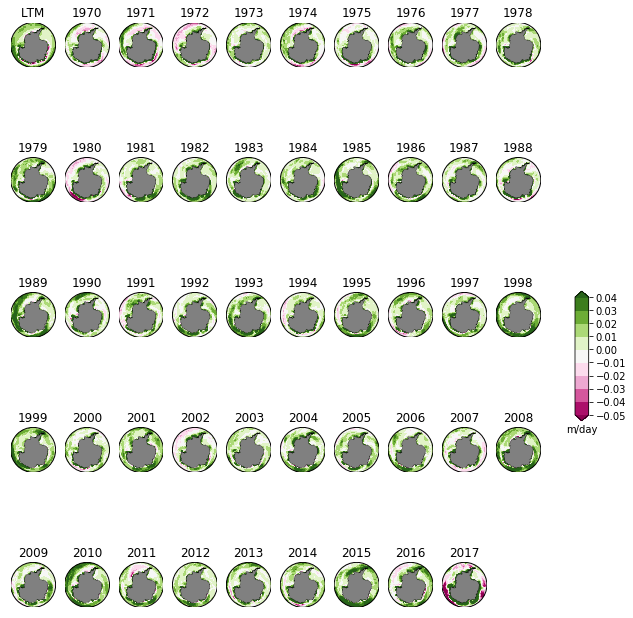

In [48]:
#convert m/s , m/day
jra_we_md=jra_we*60*60*24

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.1,.1,.02)
print clev

plt.subplot(5,10,1)
map = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
#map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,np.mean(jra_we_md,axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('m/day')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('LTM')

#clev = np.arange(-.1,.1,.01)
#clev = np.arange(-2,2.2,.2)

clev = np.arange(-.05,.05,.01)

ii=0
for yr in range(0,48):
    print yrs[yr+i_yr]
    plt.subplot(5,10,yr+2)
    map = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    #map.drawparallels(np.arange(-80.,81.,15.))
    #map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    #X, Y = map(geolon_t,geolat_t) 
    p1=map.contourf(X,Y,jra_we_md[yr+i_yr]-np.mean(jra_we_md[0:60],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.5)
    #cb.ax.set_xlabel('N/m2')
    #clev3 = np.arange(0,5000,1000)
    #map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
    #plt.title('Zonal Wind Stress Anomaly')
    plt.title(yrs[yr+i_yr])
    
ax3 = plt.axes([0.95,0.38,0.02,0.15])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('m/day')

#of = os.path.join(NYFPertDir,'tau_x.pdf')
#print of
##plt.savefig(of)
of = os.path.join(CntrlDir,'we_ekman1.png')
plt.savefig(of,dpi=220)


In [49]:
#plot wind stress curl ... Ekman pumping anomalies.
#(d(Tau_y/f) /dx - d(Tau_x/f) / dy) /rho_0

#drhodx=np.gradient(rho[0,:,:,:],dxt,axis=2)
#print drhodx.shape
tm=60
jra_Txf=tau_x/fcor
jra_Tyf=tau_y/fcor
print jra_Txf.shape

jra_dTyfdx=np.gradient(jra_Tyf,dxt,axis=2)
print jra_dTyfdx.shape
jra_dTxfdy=np.gradient(jra_Txf,dyt,axis=1)
print jra_dTxfdy.shape

rho0=1035.0
jra_we=(jra_dTyfdx-jra_dTxfdy)/rho0
print jra_we.shape


(60, 320, 640)
(60, 320, 640)
(60, 320, 640)
(60, 320, 640)


[ -5.00000000e-02  -4.00000000e-02  -3.00000000e-02  -2.00000000e-02
  -1.00000000e-02   6.93889390e-18   1.00000000e-02   2.00000000e-02
   3.00000000e-02   4.00000000e-02]
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


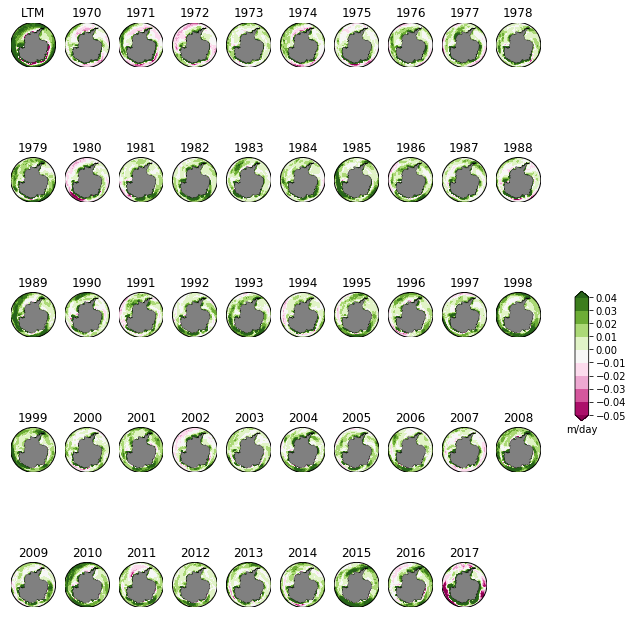

In [50]:
#convert m/s , m/day
jra_we_md=jra_we*60*60*24

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
print clev

plt.subplot(5,10,1)
map = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
#map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon,geolat) 
p1=map.contourf(X,Y,np.mean(jra_we_md[0:59],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('m/day')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('LTM')

#clev = np.arange(-.1,.1,.01)
#clev = np.arange(-2,2.2,.2)

clev = np.arange(-.05,.05,.01)

ii=0
for yr in range(0,48):
    print yrs[yr+i_yr]
    plt.subplot(5,10,yr+2)
    map = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    #map.drawparallels(np.arange(-80.,81.,15.))
    #map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    #X, Y = map(geolon_t,geolat_t) 
    p1=map.contourf(X,Y,jra_we_md[yr+i_yr]-np.mean(jra_we_md[0:60],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.5)
    #cb.ax.set_xlabel('N/m2')
    #clev3 = np.arange(0,5000,1000)
    #map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
    #plt.title('Zonal Wind Stress Anomaly')
    plt.title(yrs[yr+i_yr])
    
ax3 = plt.axes([0.95,0.38,0.02,0.15])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('m/day')

#of = os.path.join(NYFPertDir,'tau_x.pdf')
#print of
##plt.savefig(of)
of = os.path.join(CntrlDir,'we_ekman2.png')
plt.savefig(of,dpi=220)


In [51]:

import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/archive/jra/jra.ekman.all.m_day.nc', 'a')

var = ofile.variables['uas_10m']
print var.shape
print jra_we_md.shape
var[:] = jra_we_md

ofile.sync()
ofile.close()

(61, 320, 640)
(60, 320, 640)


In [53]:
import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/archive/jra/jra.ekman.all.ltm_anom.m_day.nc', 'a')

var = ofile.variables['uas_10m']
print var.shape
print jra_we_md.shape

var[:] = jra_we_md-np.mean(jra_we_md[0:60,:,:],axis=0)

ofile.sync()
ofile.close()

(61, 320, 640)
(60, 320, 640)
